In [6]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import time


price = []
area_name = []
Bathrooms = []
furniture = []
tenant_preference = []
floor = []


urls = [
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Hyderabad',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Bangalore',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=New-Delhi',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Mumbai',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Kolkata',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Chennai',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Patna',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Bhopal',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Pune',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Lucknow',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Goa',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Jaipur',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Pondicherry',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Shimla',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Gurgaon',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Gandhinagar',
     'https://www.magicbricks.com/property-for-rent/residential-real-estate?bedroom=1,2,3&proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Dehradun'
]

request_header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

start = time.time()

for url in urls:
    
    page = requests.get(url, headers=request_header)
    pagecontent = page.text

    
    soup = BeautifulSoup(pagecontent, 'html.parser')

    
    for x in soup.find_all('div', attrs={'class': 'mb-srp__card'}):
        area = x.find('h2', attrs={'class': 'mb-srp__card--title'})
        prices = x.find('div', attrs={'class': 'mb-srp__card__price--amount'})
        Bathroom = x.find('div', class_='mb-srp__card__summary__list--item', attrs={'data-summary': 'bathroom'})
        furnishing_elements = x.find('div', class_='mb-srp__card__summary__list--item', attrs={'data-summary': 'furnishing'})
        tenant_preferences = x.find('div', class_='mb-srp__card__summary__list--item', attrs={'data-summary': 'tenent-preffered'})
        floors = x.find('div', class_='mb-srp__card__summary__list--item', attrs={'data-summary': 'floor'})
        
        if area is None:
            area_name.append(np.NaN)
        else:
            area_name.append(area.get('title', np.NaN))

        if prices is None:
            price.append(np.NaN)
        else:
            price.append(prices.text.strip())
        
        if Bathroom is None:
            Bathrooms.append(np.NaN)
        else:
            value = Bathroom.find('div', class_='mb-srp__card__summary--value')
            Bathrooms.append(value.text.strip() if value else np.NaN)
        
        if furnishing_elements is None:
            furniture.append(np.NaN)
        else:
            value = furnishing_elements.find('div', class_='mb-srp__card__summary--value')
            furniture.append(value.text.strip() if value else np.NaN)
        
        if tenant_preferences is None:
            tenant_preference.append(np.NaN)
        else:
            value = tenant_preferences.find('div', class_='mb-srp__card__summary--value')
            tenant_preference.append(value.text.strip() if value else np.NaN)
        
        if floors is None:
            floor.append(np.NaN)
        else:
            value = floors.find('div', class_='mb-srp__card__summary--value')
            floor.append(value.text.strip() if value else np.NaN)

end = time.time()
print(f"Time taken: {end - start} seconds")

# Print the extracted data for verification
for i in range(len(area_name)):
    print(f"Area: {area_name[i]}, Price: {price[i]}, Bathrooms: {Bathrooms[i]}, Furniture: {furniture[i]}, Tenant Preference: {tenant_preference[i]}, Floor: {floor[i]}")


Time taken: 55.69935655593872 seconds
Area: 3 BHK Flat  for Rent in Kokapet, Outer Ring Road, Hyderabad, Price: ₹70,000, Bathrooms: 3, Furniture: Semi-Furnished, Tenant Preference: Bachelors, Floor: 19 out of 35
Area: 3 BHK Flat  for Rent in Nalagandla, Hyderabad, Price: ₹55,000, Bathrooms: 3, Furniture: Furnished, Tenant Preference: Bachelors/Family, Floor: 18 out of 20
Area: 1 BHK Flat  for Rent in Kondapur, Hyderabad, Price: ₹16,000, Bathrooms: 1, Furniture: Semi-Furnished, Tenant Preference: Bachelors, Floor: 2 out of 5
Area: 3 BHK Flat  for Rent in Masjid Banda, Hyderabad, Price: ₹1.2 Lac, Bathrooms: 3, Furniture: Semi-Furnished, Tenant Preference: Bachelors, Floor: 20 out of 20
Area: 3 BHK Flat  for Rent in Gachibowli, Hyderabad, Price: ₹90,000, Bathrooms: 3, Furniture: Semi-Furnished, Tenant Preference: Family, Floor: 9 out of 24
Area: 3 BHK Flat  for Rent in Kokapet, Outer Ring Road, Hyderabad, Price: ₹75,000, Bathrooms: 3, Furniture: Semi-Furnished, Tenant Preference: Bachelor

In [10]:
import pandas as pd
df = pd.DataFrame({
    'Area': area_name,
    'Price': price,
    'Bathrooms': Bathrooms,
    'Furniture': furniture,
    'Tenant Preference': tenant_preference,
    'Floor': floor
})
df.to_csv('properties_details.csv', index=False)

In [11]:
df=pd.read_csv('properties_details.csv')

In [12]:
df.head()

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9 out of 24


In [1]:
import pandas as pd
import numpy as np
import re

In [ ]:
regex='[\sA-Za-z0-9]+Processor'
df['ProcessorDetails']=df['Features'].apply(lambda x:re.compile(regex).findall(x))

In [ ]:
re.findall('^\w+',df['Features'][0])

In [3]:
df=pd.read_csv('properties_details.csv')

In [4]:
df.head()

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9 out of 24


In [5]:
df['Area'][0]

'3 BHK Flat  for Rent in Kokapet, Outer Ring Road, Hyderabad'

In [6]:
re.findall('\w+\s+BHK',df['Area'][0])

['3 BHK']

In [7]:
regex='\w+\s+BHK'
df['Flat']=df['Area'].apply(lambda x:re.compile(regex).findall(x))

In [28]:
df.head(20)

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35,[3 BHK]
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20,[3 BHK]
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5,[1 BHK]
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20,[3 BHK]
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9 out of 24,[3 BHK]
5,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹75,000",3.0,Semi-Furnished,Bachelors,18 out of 32,[3 BHK]
6,3 BHK Flat for Rent in Telecom Nagar Gachibow...,"₹75,000",4.0,Furnished,Family,4 out of 14,[3 BHK]
7,3 BHK Villa for Rent in Bachupally Hyderabad,"₹35,000",3.0,Semi-Furnished,Family,NaN,[3 BHK]
8,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹84,000",3.0,Furnished,Bachelors,27 out of 31,[3 BHK]
9,"3 BHK Flat for Rent in Kondapur, Hyderabad","₹65,000",3.0,Unfurnished,Bachelors/Family,7 out of 18,[3 BHK]


In [27]:
df['Area']

0      3 BHK Flat  for Rent in Kokapet, Outer Ring Ro...
1          3 BHK Flat  for Rent in Nalagandla, Hyderabad
2            1 BHK Flat  for Rent in Kondapur, Hyderabad
3        3 BHK Flat  for Rent in Masjid Banda, Hyderabad
4          3 BHK Flat  for Rent in Gachibowli, Hyderabad
                             ...                        
505    2 BHK Flat  for Rent in Windlass River Valley,...
506       2 BHK  House for Rent in Shewla Kalan Dehradun
507    3 BHK Flat  for Rent in Kaushalya Tower, Turne...
508             2 BHK  House for Rent in Raipur Dehradun
509    3 BHK Flat  for Rent in Doon Vihar, Jakhan, De...
Name: Area, Length: 510, dtype: object

In [29]:
df['Area'][20]

'3 BHK Flat  for Rent in Gachibowli, Hyderabad'

In [31]:
df['Area'][55]

'3 BHK Flat  for Rent in Naidu Layout Electronic City, Bangalore'

In [32]:
re.findall('\s+\w+$',df['Area'][0])

[' Hyderabad']

In [33]:
regex= '\s+\w+$'
df['Location'] = df['Area'].apply(lambda x:re.compile(regex).findall(x))

In [37]:
df.axes

[RangeIndex(start=0, stop=510, step=1),
 Index(['Area', 'Price', 'Bathrooms', 'Furniture', 'Tenant Preference', 'Floor',
        'Flat', 'Location'],
       dtype='object')]

In [50]:
re.findall('for Rent in ([^,]+)',df['Area'][4])

['Gachibowli']

In [51]:
regex='for Rent in ([^,]+)'
df['Area1']=df['Area'].apply(lambda x:re.compile(regex).findall(x))

In [53]:
df.head(56)

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area1
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35,[3 BHK],[ Hyderabad],[Kokapet]
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20,[3 BHK],[ Hyderabad],[Nalagandla]
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5,[1 BHK],[ Hyderabad],[Kondapur]
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20,[3 BHK],[ Hyderabad],[Masjid Banda]
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9 out of 24,[3 BHK],[ Hyderabad],[Gachibowli]
5,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹75,000",3.0,Semi-Furnished,Bachelors,18 out of 32,[3 BHK],[ Hyderabad],[Kokapet]
6,3 BHK Flat for Rent in Telecom Nagar Gachibow...,"₹75,000",4.0,Furnished,Family,4 out of 14,[3 BHK],[ Hyderabad],[Telecom Nagar Gachibowli]
7,3 BHK Villa for Rent in Bachupally Hyderabad,"₹35,000",3.0,Semi-Furnished,Family,NaN,[3 BHK],[ Hyderabad],[Bachupally Hyderabad]
8,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹84,000",3.0,Furnished,Bachelors,27 out of 31,[3 BHK],[ Hyderabad],[Gachibowli]
9,"3 BHK Flat for Rent in Kondapur, Hyderabad","₹65,000",3.0,Unfurnished,Bachelors/Family,7 out of 18,[3 BHK],[ Hyderabad],[Kondapur]


In [70]:
df=pd.read_csv('properties_details.csv')

In [3]:
df.dtypes

Area                  object
Price                 object
Bathrooms            float64
Furniture             object
Tenant Preference     object
Floor                 object
dtype: object

In [4]:
df['Price'].head()

0     ₹70,000
1     ₹55,000
2     ₹16,000
3    ₹1.2 Lac
4     ₹90,000
Name: Price, dtype: object

In [6]:
df.drop(['Area'],axis=1)

,Price,Bathrooms,Furniture,Tenant Preference,Floor
0,"₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35
1,"₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20
2,"₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5
3,₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20
4,"₹90,000",3.0,Semi-Furnished,Family,9 out of 24
...,...,...,...,...,...
505,"₹16,000",2.0,Semi-Furnished,Bachelors,1 out of 6
506,"₹18,000",3.0,Semi-Furnished,Bachelors,Ground out of 2
507,"₹25,000",2.0,Semi-Furnished,Family,3 out of 4
508,"₹20,000",2.0,Furnished,Bachelors,Ground out of 1


In [7]:
df.head()

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9 out of 24


In [8]:
regex='\w+\s+BHK'
df['Flat']=df['Area'].apply(lambda x:re.compile(regex).findall(x))

In [9]:
df

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35,[3 BHK]
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20,[3 BHK]
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5,[1 BHK]
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20,[3 BHK]
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9 out of 24,[3 BHK]
...,...,...,...,...,...,...,...
505,"2 BHK Flat for Rent in Windlass River Valley,...","₹16,000",2.0,Semi-Furnished,Bachelors,1 out of 6,[2 BHK]
506,2 BHK House for Rent in Shewla Kalan Dehradun,"₹18,000",3.0,Semi-Furnished,Bachelors,Ground out of 2,[2 BHK]
507,"3 BHK Flat for Rent in Kaushalya Tower, Turne...","₹25,000",2.0,Semi-Furnished,Family,3 out of 4,[3 BHK]
508,2 BHK House for Rent in Raipur Dehradun,"₹20,000",2.0,Furnished,Bachelors,Ground out of 1,[2 BHK]


In [10]:
regex= '\s+\w+$'
df['Location'] = df['Area'].apply(lambda x:re.compile(regex).findall(x))

In [11]:
df

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35,[3 BHK],[ Hyderabad]
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20,[3 BHK],[ Hyderabad]
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5,[1 BHK],[ Hyderabad]
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20,[3 BHK],[ Hyderabad]
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9 out of 24,[3 BHK],[ Hyderabad]
...,...,...,...,...,...,...,...,...
505,"2 BHK Flat for Rent in Windlass River Valley,...","₹16,000",2.0,Semi-Furnished,Bachelors,1 out of 6,[2 BHK],[ Dehradun]
506,2 BHK House for Rent in Shewla Kalan Dehradun,"₹18,000",3.0,Semi-Furnished,Bachelors,Ground out of 2,[2 BHK],[ Dehradun]
507,"3 BHK Flat for Rent in Kaushalya Tower, Turne...","₹25,000",2.0,Semi-Furnished,Family,3 out of 4,[3 BHK],[ Dehradun]
508,2 BHK House for Rent in Raipur Dehradun,"₹20,000",2.0,Furnished,Bachelors,Ground out of 1,[2 BHK],[ Dehradun]


In [12]:
regex='for Rent in ([^,]+)'
df['Area1']=df['Area'].apply(lambda x:re.compile(regex).findall(x))

In [13]:
df

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area1
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35,[3 BHK],[ Hyderabad],[Kokapet]
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20,[3 BHK],[ Hyderabad],[Nalagandla]
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5,[1 BHK],[ Hyderabad],[Kondapur]
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20,[3 BHK],[ Hyderabad],[Masjid Banda]
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9 out of 24,[3 BHK],[ Hyderabad],[Gachibowli]
...,...,...,...,...,...,...,...,...,...
505,"2 BHK Flat for Rent in Windlass River Valley,...","₹16,000",2.0,Semi-Furnished,Bachelors,1 out of 6,[2 BHK],[ Dehradun],[Windlass River Valley]
506,2 BHK House for Rent in Shewla Kalan Dehradun,"₹18,000",3.0,Semi-Furnished,Bachelors,Ground out of 2,[2 BHK],[ Dehradun],[Shewla Kalan Dehradun]
507,"3 BHK Flat for Rent in Kaushalya Tower, Turne...","₹25,000",2.0,Semi-Furnished,Family,3 out of 4,[3 BHK],[ Dehradun],[Kaushalya Tower]
508,2 BHK House for Rent in Raipur Dehradun,"₹20,000",2.0,Furnished,Bachelors,Ground out of 1,[2 BHK],[ Dehradun],[Raipur Dehradun]


In [14]:
df.to_csv('magicbricks_data.csv',index=False)

In [15]:
df1=pd.read_csv('magicbricks_data.csv')

In [16]:
df1

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area1
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35,['3 BHK'],[' Hyderabad'],['Kokapet']
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20,['3 BHK'],[' Hyderabad'],['Nalagandla']
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5,['1 BHK'],[' Hyderabad'],['Kondapur']
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20,['3 BHK'],[' Hyderabad'],['Masjid Banda']
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9 out of 24,['3 BHK'],[' Hyderabad'],['Gachibowli']
...,...,...,...,...,...,...,...,...,...
505,"2 BHK Flat for Rent in Windlass River Valley,...","₹16,000",2.0,Semi-Furnished,Bachelors,1 out of 6,['2 BHK'],[' Dehradun'],['Windlass River Valley']
506,2 BHK House for Rent in Shewla Kalan Dehradun,"₹18,000",3.0,Semi-Furnished,Bachelors,Ground out of 2,['2 BHK'],[' Dehradun'],['Shewla Kalan Dehradun']
507,"3 BHK Flat for Rent in Kaushalya Tower, Turne...","₹25,000",2.0,Semi-Furnished,Family,3 out of 4,['3 BHK'],[' Dehradun'],['Kaushalya Tower']
508,2 BHK House for Rent in Raipur Dehradun,"₹20,000",2.0,Furnished,Bachelors,Ground out of 1,['2 BHK'],[' Dehradun'],['Raipur Dehradun']


In [18]:
df1.drop('Area',axis=1,inplace=True)

In [19]:
df1

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area1
0,"₹70,000",3.0,Semi-Furnished,Bachelors,19 out of 35,['3 BHK'],[' Hyderabad'],['Kokapet']
1,"₹55,000",3.0,Furnished,Bachelors/Family,18 out of 20,['3 BHK'],[' Hyderabad'],['Nalagandla']
2,"₹16,000",1.0,Semi-Furnished,Bachelors,2 out of 5,['1 BHK'],[' Hyderabad'],['Kondapur']
3,₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20 out of 20,['3 BHK'],[' Hyderabad'],['Masjid Banda']
4,"₹90,000",3.0,Semi-Furnished,Family,9 out of 24,['3 BHK'],[' Hyderabad'],['Gachibowli']
...,...,...,...,...,...,...,...,...
505,"₹16,000",2.0,Semi-Furnished,Bachelors,1 out of 6,['2 BHK'],[' Dehradun'],['Windlass River Valley']
506,"₹18,000",3.0,Semi-Furnished,Bachelors,Ground out of 2,['2 BHK'],[' Dehradun'],['Shewla Kalan Dehradun']
507,"₹25,000",2.0,Semi-Furnished,Family,3 out of 4,['3 BHK'],[' Dehradun'],['Kaushalya Tower']
508,"₹20,000",2.0,Furnished,Bachelors,Ground out of 1,['2 BHK'],[' Dehradun'],['Raipur Dehradun']


In [22]:
df1.Price

0       ₹70,000
1       ₹55,000
2       ₹16,000
3      ₹1.2 Lac
4       ₹90,000
         ...   
505     ₹16,000
506     ₹18,000
507     ₹25,000
508     ₹20,000
509     ₹25,000
Name: Price, Length: 510, dtype: object

In [24]:
df1['Price'] = df1['Price'].str.replace('₹', '').str.replace(',', '')

In [25]:
df1['Price']

0        70000
1        55000
2        16000
3      1.2 Lac
4        90000
        ...   
505      16000
506      18000
507      25000
508      20000
509      25000
Name: Price, Length: 510, dtype: object

In [28]:
lac_mask = df1['Price'].str.contains('Lac')
df1.loc[lac_mask, 'Price'] = df1.loc[lac_mask, 'Price'].str.replace('Lac', '').astype(float) * 100000

In [29]:
df1['Price']

0         70000
1         55000
2         16000
3      120000.0
4         90000
         ...   
505       16000
506       18000
507       25000
508       20000
509       25000
Name: Price, Length: 510, dtype: object

In [31]:
df1['Price'] = df1['Price'].astype(int)

In [32]:
df1.dtypes

Price                  int32
Bathrooms            float64
Furniture             object
Tenant Preference     object
Floor                 object
Flat                  object
Location              object
Area1                 object
dtype: object

In [36]:
df1.isnull().sum()

Price                 0
Bathrooms             1
Furniture             1
Tenant Preference     0
Floor                66
Flat                  0
Location              0
Area1                 0
dtype: int64

In [37]:
df1['Location']

0      [' Hyderabad']
1      [' Hyderabad']
2      [' Hyderabad']
3      [' Hyderabad']
4      [' Hyderabad']
            ...      
505     [' Dehradun']
506     [' Dehradun']
507     [' Dehradun']
508     [' Dehradun']
509     [' Dehradun']
Name: Location, Length: 510, dtype: object

In [38]:
df1['Location'] = df1['Location'].str.replace(r"[\[\]']", '', regex=True).str.strip()

In [39]:
df1['Location']

0      Hyderabad
1      Hyderabad
2      Hyderabad
3      Hyderabad
4      Hyderabad
         ...    
505     Dehradun
506     Dehradun
507     Dehradun
508     Dehradun
509     Dehradun
Name: Location, Length: 510, dtype: object

In [41]:
df1['Flat']

0      ['3 BHK']
1      ['3 BHK']
2      ['1 BHK']
3      ['3 BHK']
4      ['3 BHK']
         ...    
505    ['2 BHK']
506    ['2 BHK']
507    ['3 BHK']
508    ['2 BHK']
509    ['3 BHK']
Name: Flat, Length: 510, dtype: object

In [42]:
df1['Flat'] = df1['Flat'].str.replace(r"[\[\]']", '', regex=True).str.strip()

In [43]:
df1['Flat']

0      3 BHK
1      3 BHK
2      1 BHK
3      3 BHK
4      3 BHK
       ...  
505    2 BHK
506    2 BHK
507    3 BHK
508    2 BHK
509    3 BHK
Name: Flat, Length: 510, dtype: object

In [44]:
df1.head()

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area1
0,70000,3.0,Semi-Furnished,Bachelors,19 out of 35,3 BHK,Hyderabad,['Kokapet']
1,55000,3.0,Furnished,Bachelors/Family,18 out of 20,3 BHK,Hyderabad,['Nalagandla']
2,16000,1.0,Semi-Furnished,Bachelors,2 out of 5,1 BHK,Hyderabad,['Kondapur']
3,120000,3.0,Semi-Furnished,Bachelors,20 out of 20,3 BHK,Hyderabad,['Masjid Banda']
4,90000,3.0,Semi-Furnished,Family,9 out of 24,3 BHK,Hyderabad,['Gachibowli']


In [45]:
df1['Tenant Preference']

0             Bachelors
1      Bachelors/Family
2             Bachelors
3             Bachelors
4                Family
             ...       
505           Bachelors
506           Bachelors
507              Family
508           Bachelors
509    Bachelors/Family
Name: Tenant Preference, Length: 510, dtype: object

In [46]:
df1.head()

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area1
0,70000,3.0,Semi-Furnished,Bachelors,19 out of 35,3 BHK,Hyderabad,['Kokapet']
1,55000,3.0,Furnished,Bachelors/Family,18 out of 20,3 BHK,Hyderabad,['Nalagandla']
2,16000,1.0,Semi-Furnished,Bachelors,2 out of 5,1 BHK,Hyderabad,['Kondapur']
3,120000,3.0,Semi-Furnished,Bachelors,20 out of 20,3 BHK,Hyderabad,['Masjid Banda']
4,90000,3.0,Semi-Furnished,Family,9 out of 24,3 BHK,Hyderabad,['Gachibowli']


In [47]:
df1['Area1'] = df1['Area1'].str.replace(r"[\[\]']", '', regex=True).str.strip()

In [48]:
df1.head()

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area1
0,70000,3.0,Semi-Furnished,Bachelors,19 out of 35,3 BHK,Hyderabad,Kokapet
1,55000,3.0,Furnished,Bachelors/Family,18 out of 20,3 BHK,Hyderabad,Nalagandla
2,16000,1.0,Semi-Furnished,Bachelors,2 out of 5,1 BHK,Hyderabad,Kondapur
3,120000,3.0,Semi-Furnished,Bachelors,20 out of 20,3 BHK,Hyderabad,Masjid Banda
4,90000,3.0,Semi-Furnished,Family,9 out of 24,3 BHK,Hyderabad,Gachibowli


In [49]:
df1['Floor']

0         19 out of 35
1         18 out of 20
2           2 out of 5
3         20 out of 20
4          9 out of 24
            ...       
505         1 out of 6
506    Ground out of 2
507         3 out of 4
508    Ground out of 1
509         1 out of 3
Name: Floor, Length: 510, dtype: object

In [71]:
df[['Floor', 'Total Floors']] = df['Floor'].str.extract(r'(\d+) out of (\d+)')
df['Floor'] = df['Floor'].fillna('Ground').replace('Ground', '0')

In [72]:
df.head()

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor,Total Floors
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19,35
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18,20
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2,5
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20,20
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9,24


In [73]:
df.head(200)

,Area,Price,Bathrooms,Furniture,Tenant Preference,Floor,Total Floors
0,"3 BHK Flat for Rent in Kokapet, Outer Ring Ro...","₹70,000",3.0,Semi-Furnished,Bachelors,19,35
1,"3 BHK Flat for Rent in Nalagandla, Hyderabad","₹55,000",3.0,Furnished,Bachelors/Family,18,20
2,"1 BHK Flat for Rent in Kondapur, Hyderabad","₹16,000",1.0,Semi-Furnished,Bachelors,2,5
3,"3 BHK Flat for Rent in Masjid Banda, Hyderabad",₹1.2 Lac,3.0,Semi-Furnished,Bachelors,20,20
4,"3 BHK Flat for Rent in Gachibowli, Hyderabad","₹90,000",3.0,Semi-Furnished,Family,9,24
...,...,...,...,...,...,...,...
195,2 BHK House for Rent in Rajeev Nagar Patna,"₹13,000",2.0,Semi-Furnished,Bachelors/Family,0,NaN
196,3 BHK Villa for Rent in Khagaul Road Patna,"₹32,000",3.0,Furnished,Bachelors,0,NaN
197,"3 BHK Flat for Rent in Danapur, Patna","₹35,000",3.0,Semi-Furnished,Bachelors/Family,5,10
198,"3 BHK Flat for Rent in Fraser Road, Patna","₹35,000",2.0,Furnished,Bachelors,3,4


In [62]:
df1

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area1
0,70000,3.0,Semi-Furnished,Bachelors,19 out of 35,3 BHK,Hyderabad,Kokapet
1,55000,3.0,Furnished,Bachelors/Family,18 out of 20,3 BHK,Hyderabad,Nalagandla
2,16000,1.0,Semi-Furnished,Bachelors,2 out of 5,1 BHK,Hyderabad,Kondapur
3,120000,3.0,Semi-Furnished,Bachelors,20 out of 20,3 BHK,Hyderabad,Masjid Banda
4,90000,3.0,Semi-Furnished,Family,9 out of 24,3 BHK,Hyderabad,Gachibowli
...,...,...,...,...,...,...,...,...
505,16000,2.0,Semi-Furnished,Bachelors,1 out of 6,2 BHK,Dehradun,Windlass River Valley
506,18000,3.0,Semi-Furnished,Bachelors,Ground out of 2,2 BHK,Dehradun,Shewla Kalan Dehradun
507,25000,2.0,Semi-Furnished,Family,3 out of 4,3 BHK,Dehradun,Kaushalya Tower
508,20000,2.0,Furnished,Bachelors,Ground out of 1,2 BHK,Dehradun,Raipur Dehradun


In [75]:
df1[195:196]

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area1
195,13000,2.0,Semi-Furnished,Bachelors/Family,NaN,2 BHK,Patna,Rajeev Nagar Patna


In [76]:
df.dtypes

Area                  object
Price                 object
Bathrooms            float64
Furniture             object
Tenant Preference     object
Floor                 object
Total Floors          object
dtype: object

In [78]:
df.isnull().sum()

Area                   0
Price                  0
Bathrooms              1
Furniture              1
Tenant Preference      0
Floor                  0
Total Floors         116
dtype: int64

In [81]:
df1.isnull().sum()

Price                 0
Bathrooms             1
Furniture             1
Tenant Preference     0
Floor                66
Flat                  0
Location              0
Area1                 0
dtype: int64

In [82]:
df1['Price']=df1['Price'].astype('int')

In [83]:
df1.dtypes

Price                  int32
Bathrooms            float64
Furniture             object
Tenant Preference     object
Floor                 object
Flat                  object
Location              object
Area1                 object
dtype: object

In [87]:
df1.columns

Index(['Price', 'Bathrooms', 'Furniture', 'Tenant Preference', 'Floor', 'Flat',
       'Location', 'Area1'],
      dtype='object')

In [88]:
df1=df1.rename(columns={'Area1':'Area'})

In [89]:
df1

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area
0,70000,3.0,Semi-Furnished,Bachelors,19 out of 35,3 BHK,Hyderabad,Kokapet
1,55000,3.0,Furnished,Bachelors/Family,18 out of 20,3 BHK,Hyderabad,Nalagandla
2,16000,1.0,Semi-Furnished,Bachelors,2 out of 5,1 BHK,Hyderabad,Kondapur
3,120000,3.0,Semi-Furnished,Bachelors,20 out of 20,3 BHK,Hyderabad,Masjid Banda
4,90000,3.0,Semi-Furnished,Family,9 out of 24,3 BHK,Hyderabad,Gachibowli
...,...,...,...,...,...,...,...,...
505,16000,2.0,Semi-Furnished,Bachelors,1 out of 6,2 BHK,Dehradun,Windlass River Valley
506,18000,3.0,Semi-Furnished,Bachelors,Ground out of 2,2 BHK,Dehradun,Shewla Kalan Dehradun
507,25000,2.0,Semi-Furnished,Family,3 out of 4,3 BHK,Dehradun,Kaushalya Tower
508,20000,2.0,Furnished,Bachelors,Ground out of 1,2 BHK,Dehradun,Raipur Dehradun


In [90]:
df1[['Floor', 'Total Floors']] = df1['Floor'].str.extract(r'(\d+) out of (\d+)')
df1['Floor'] = df1['Floor'].fillna('Ground').replace('Ground', '0')

In [91]:
df1

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area,Total Floors
0,70000,3.0,Semi-Furnished,Bachelors,19,3 BHK,Hyderabad,Kokapet,35
1,55000,3.0,Furnished,Bachelors/Family,18,3 BHK,Hyderabad,Nalagandla,20
2,16000,1.0,Semi-Furnished,Bachelors,2,1 BHK,Hyderabad,Kondapur,5
3,120000,3.0,Semi-Furnished,Bachelors,20,3 BHK,Hyderabad,Masjid Banda,20
4,90000,3.0,Semi-Furnished,Family,9,3 BHK,Hyderabad,Gachibowli,24
...,...,...,...,...,...,...,...,...,...
505,16000,2.0,Semi-Furnished,Bachelors,1,2 BHK,Dehradun,Windlass River Valley,6
506,18000,3.0,Semi-Furnished,Bachelors,0,2 BHK,Dehradun,Shewla Kalan Dehradun,NaN
507,25000,2.0,Semi-Furnished,Family,3,3 BHK,Dehradun,Kaushalya Tower,4
508,20000,2.0,Furnished,Bachelors,0,2 BHK,Dehradun,Raipur Dehradun,NaN


In [92]:
df1.isnull().sum()

Price                  0
Bathrooms              1
Furniture              1
Tenant Preference      0
Floor                  0
Flat                   0
Location               0
Area                   0
Total Floors         116
dtype: int64

In [96]:
df1.dtypes

Price                  int32
Bathrooms            float64
Furniture             object
Tenant Preference     object
Floor                 object
Flat                  object
Location              object
Area                  object
Total Floors          object
dtype: object

In [98]:
df1.head()

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area,Total Floors
0,70000,3.0,Semi-Furnished,Bachelors,19,3 BHK,Hyderabad,Kokapet,35
1,55000,3.0,Furnished,Bachelors/Family,18,3 BHK,Hyderabad,Nalagandla,20
2,16000,1.0,Semi-Furnished,Bachelors,2,1 BHK,Hyderabad,Kondapur,5
3,120000,3.0,Semi-Furnished,Bachelors,20,3 BHK,Hyderabad,Masjid Banda,20
4,90000,3.0,Semi-Furnished,Family,9,3 BHK,Hyderabad,Gachibowli,24


In [99]:
df1['Floor']=df1['Floor'].astype('int')

In [100]:
df1.dtypes

Price                  int32
Bathrooms            float64
Furniture             object
Tenant Preference     object
Floor                  int32
Flat                  object
Location              object
Area                  object
Total Floors          object
dtype: object

In [101]:
df1.to_csv('magicbricks.dataset.csv',index=False)

In [2]:
import pandas as pd
df=pd.read_csv('magicbricks.dataset.csv')

In [3]:
df.head()

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area,Total Floors
0,70000,3.0,Semi-Furnished,Bachelors,19,3 BHK,Hyderabad,Kokapet,35.0
1,55000,3.0,Furnished,Bachelors/Family,18,3 BHK,Hyderabad,Nalagandla,20.0
2,16000,1.0,Semi-Furnished,Bachelors,2,1 BHK,Hyderabad,Kondapur,5.0
3,120000,3.0,Semi-Furnished,Bachelors,20,3 BHK,Hyderabad,Masjid Banda,20.0
4,90000,3.0,Semi-Furnished,Family,9,3 BHK,Hyderabad,Gachibowli,24.0


In [4]:
df['Flat'][0]

'3 BHK'

In [1]:
import re

In [6]:
re.findall('\d+',df['Flat'][0])

['3']

In [7]:
regex = '\d+'
df['Flat']=df['Flat'].apply(lambda x:re.compile(regex).findall(x))

In [1]:
## df['Flat'] = df['Flat'].str.replace('','')

In [12]:
df['Flat'].head(5)

0    [3]
1    [3]
2    [1]
3    [3]
4    [3]
Name: Flat, dtype: object

In [16]:
df['Flat']

0      [3]
1      [3]
2      [1]
3      [3]
4      [3]
      ... 
505    [2]
506    [2]
507    [3]
508    [2]
509    [3]
Name: Flat, Length: 510, dtype: object

In [17]:
df['Flat'] = [x[0] for x in df['Flat']]

In [19]:
df['Flat']=df['Flat'].astype(int)

In [20]:
df['Flat']

0      3
1      3
2      1
3      3
4      3
      ..
505    2
506    2
507    3
508    2
509    3
Name: Flat, Length: 510, dtype: int32

In [21]:
df.to_csv('magicbricks2.csv',index=False)

In [31]:
import pandas as pd
df=pd.read_csv('magicbricks3.csv')

In [20]:
df.head()

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area,Total Floors
0,70000,3.0,Semi-Furnished,Bachelors,19,3,Hyderabad,Kokapet,35.0
1,55000,3.0,Furnished,Bachelors/Family,18,3,Hyderabad,Nalagandla,20.0
2,16000,1.0,Semi-Furnished,Bachelors,2,1,Hyderabad,Kondapur,5.0
3,120000,3.0,Semi-Furnished,Bachelors,20,3,Hyderabad,Masjid Banda,20.0
4,90000,3.0,Semi-Furnished,Family,9,3,Hyderabad,Gachibowli,24.0


In [21]:
df.describe()

,Price,Bathrooms,Floor,Flat,Total Floors
count,510.000000,509.000000,510.000000,510.000000,510.000000
mean,47898.817647,2.369352,4.770588,2.466667,10.800000
std,53798.572857,0.766629,7.026495,0.652836,12.054363
min,3500.000000,1.000000,0.000000,1.000000,1.000000
25%,18000.000000,2.000000,1.000000,2.000000,3.000000
50%,29000.000000,2.000000,2.000000,3.000000,6.000000
75%,55750.000000,3.000000,6.000000,3.000000,14.000000
max,450000.000000,5.000000,70.000000,3.000000,77.000000


In [22]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

In [23]:
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR

In [24]:
median_price = df['Price'].median()

df['Price'] = df['Price'].apply(lambda x: median_price if x < outlier_lower_bound or x > outlier_upper_bound else x)

print("DataFrame after replacing outliers:")
print(df)

DataFrame after replacing outliers:
       Price  Bathrooms       Furniture Tenant Preference  Floor  Flat  \
0    70000.0        3.0  Semi-Furnished         Bachelors     19     3   
1    55000.0        3.0       Furnished  Bachelors/Family     18     3   
2    16000.0        1.0  Semi-Furnished         Bachelors      2     1   
3    29000.0        3.0  Semi-Furnished         Bachelors     20     3   
4    90000.0        3.0  Semi-Furnished            Family      9     3   
..       ...        ...             ...               ...    ...   ...   
505  16000.0        2.0  Semi-Furnished         Bachelors      1     2   
506  18000.0        3.0  Semi-Furnished         Bachelors      0     2   
507  25000.0        2.0  Semi-Furnished            Family      3     3   
508  20000.0        2.0       Furnished         Bachelors      0     2   
509  25000.0        3.0  Semi-Furnished  Bachelors/Family      1     3   

      Location                   Area  Total Floors  
0    Hyderabad       

In [25]:
df.describe()

,Price,Bathrooms,Floor,Flat,Total Floors
count,510.000000,509.000000,510.000000,510.000000,510.000000
mean,34818.425490,2.369352,4.770588,2.466667,10.800000
std,23128.560477,0.766629,7.026495,0.652836,12.054363
min,3500.000000,1.000000,0.000000,1.000000,1.000000
25%,18000.000000,2.000000,1.000000,2.000000,3.000000
50%,29000.000000,2.000000,2.000000,3.000000,6.000000
75%,46875.000000,3.000000,6.000000,3.000000,14.000000
max,110000.000000,5.000000,70.000000,3.000000,77.000000


In [26]:
df.to_csv('magicbricks5.csv',index=False)

In [32]:
import numpy as np
from scipy import stats

In [33]:
df['price1']= np.abs(stats.zscore(df['Price']))

In [34]:
df['price1']

0      0.411217
1      0.132125
2      0.593513
3      1.341522
4      0.783339
         ...   
505    0.593513
506    0.556301
507    0.426058
508    0.519088
509    0.426058
Name: price1, Length: 510, dtype: float64

In [35]:
threshold=3
no_of_outliers=df[df['price1']<threshold]

In [36]:
len(no_of_outliers)

499

In [37]:
df.describe()

,Price,Bathrooms,Floor,Flat,Total Floors,price1
count,510.000000,509.000000,510.000000,510.000000,510.000000,510.000000
mean,47898.817647,2.369352,4.770588,2.466667,10.800000,0.627120
std,53798.572857,0.766629,7.026495,0.652836,12.054363,0.779687
min,3500.000000,1.000000,0.000000,1.000000,1.000000,0.001883
25%,18000.000000,2.000000,1.000000,2.000000,3.000000,0.295815
50%,29000.000000,2.000000,2.000000,3.000000,6.000000,0.504247
75%,55750.000000,3.000000,6.000000,3.000000,14.000000,0.649331
max,450000.000000,5.000000,70.000000,3.000000,77.000000,7.481536


In [39]:
no_of_outliers.describe()

,Price,Bathrooms,Floor,Flat,Total Floors,price1
count,499.000000,498.000000,499.000000,499.000000,499.000000,499.000000
mean,42181.156313,2.351406,4.440882,2.460922,10.198397,0.534561
std,36306.299807,0.757928,6.093483,0.652441,10.641036,0.425836
min,3500.000000,1.000000,0.000000,1.000000,1.000000,0.001883
25%,18000.000000,2.000000,1.000000,2.000000,3.000000,0.277209
50%,28000.000000,2.000000,2.000000,3.000000,6.000000,0.500482
75%,55000.000000,3.000000,6.000000,3.000000,14.000000,0.626073
max,200000.000000,5.000000,40.000000,3.000000,75.000000,2.830010


In [40]:
len(no_of_outliers['Price'])

499

In [41]:
df=no_of_outliers.drop('price1',axis=1)

In [42]:
df

,Price,Bathrooms,Furniture,Tenant Preference,Floor,Flat,Location,Area,Total Floors
0,70000,3.0,Semi-Furnished,Bachelors,19,3,Hyderabad,Kokapet,35.0
1,55000,3.0,Furnished,Bachelors/Family,18,3,Hyderabad,Nalagandla,20.0
2,16000,1.0,Semi-Furnished,Bachelors,2,1,Hyderabad,Kondapur,5.0
3,120000,3.0,Semi-Furnished,Bachelors,20,3,Hyderabad,Masjid Banda,20.0
4,90000,3.0,Semi-Furnished,Family,9,3,Hyderabad,Gachibowli,24.0
...,...,...,...,...,...,...,...,...,...
505,16000,2.0,Semi-Furnished,Bachelors,1,2,Dehradun,Windlass River Valley,6.0
506,18000,3.0,Semi-Furnished,Bachelors,0,2,Dehradun,Shewla Kalan Dehradun,4.0
507,25000,2.0,Semi-Furnished,Family,3,3,Dehradun,Kaushalya Tower,4.0
508,20000,2.0,Furnished,Bachelors,0,2,Dehradun,Raipur Dehradun,3.0


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Price'>

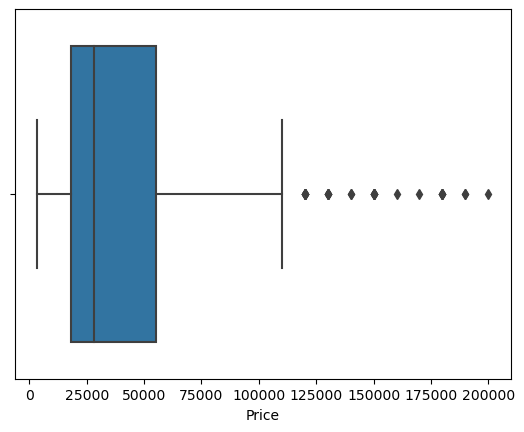

In [45]:
sns.boxplot(x=df['Price'])

In [1]:
import pandas as pd
df=pd.read_csv('magicbricks5.csv')

In [3]:
df.dtypes

Price                float64
Bathrooms            float64
Furniture             object
Tenant Preference     object
Floor                  int64
Flat                   int64
Location              object
Area                  object
Total Floors         float64
dtype: object

In [4]:
df['Price']=df['Price'].astype('int')

In [5]:
df['Price']

0      70000
1      55000
2      16000
3      29000
4      90000
       ...  
505    16000
506    18000
507    25000
508    20000
509    25000
Name: Price, Length: 510, dtype: int32

In [7]:
df.to_csv('magicbricks6.csv',index=False)